In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score


In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv')

In [6]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### As such no null data present

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.shape

(400, 5)

### Splitting the data into x and y variables


In [11]:
x = df.iloc[:,2:4]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [12]:
y = df.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
x_train

,Age,EstimatedSalary
247,57,122000
110,39,71000
16,47,25000
66,24,19000
153,36,50000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [15]:
x_test

,Age,EstimatedSalary
209,46,22000
280,59,88000
33,28,44000
210,48,96000
93,29,28000
...,...,...
314,39,79000
373,59,130000
380,42,64000
239,53,143000


In [16]:
y_train

247    1
110    0
16     1
66     0
153    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 300, dtype: int64

In [17]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64

In [18]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [19]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
       
print(x_test[:10])
print('-'*15)
print(pred[:10])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]]
---------------
[0 1 0 1 0 0 1 0 0 0]


In [20]:
print(pred[:20])
print('-'*15)
print(y_test[:20])

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1]
---------------
209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
9      0
361    1
56     0
72     0
132    0
42     0
278    1
376    0
231    0
385    1
Name: Purchased, dtype: int64


### Confusion matrix

In [21]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
print(tp,tn,fp,fn)

[[61  2]
 [12 25]]
25 61 2 12


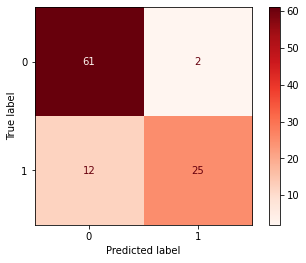

In [22]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Reds)
plt.show()

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [24]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))



Accuracy: 0.86
Error Rate:  0.14
Sensitivity (Recall or True positive rate) : 0.6756756756756757
Specificity (True negative rate) : 0.9682539682539683
Precision (Positive predictive value) : 0.9259259259259259
False Positive Rate : 0.031746031746031744
